<a href="https://colab.research.google.com/github/alessandrotofani/Tesi_magistrale/blob/master/2_eda_Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
import sys 
sys.path.append('/content/drive/MyDrive/Tesi_magistrale/Tesi_magistrale')
import mf

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Card type

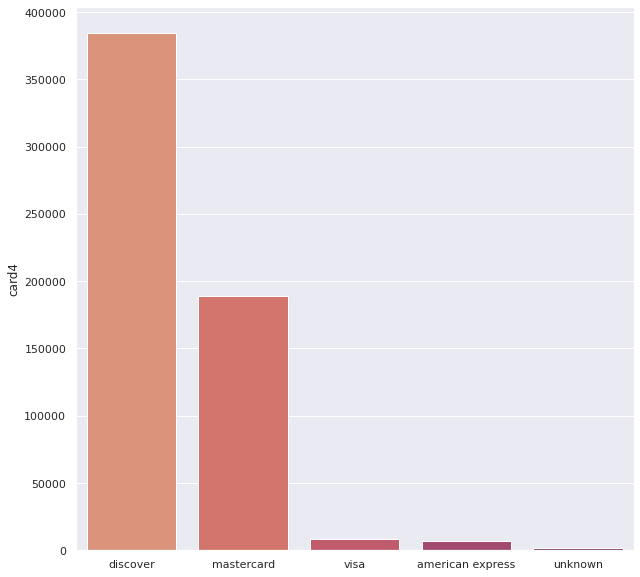

In [17]:
x = data['card4'].unique()
y = data['card4'].value_counts()
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=x, y=y, palette=sns.color_palette("flare"))

# Feature engineering and scaling

In [ ]:
data = mf.feature_engineering(data)
data = mf.feature_scaling(data)
data = pd.get_dummies(data)

# New feature analysis

`fraud_ratio_per_tim(data, day=False, hour=False)`: restituisce un dizionario contenente il rate di transazioni fraudolente per unità di tempo (giorno o ora). 

In [ ]:
day_ratio = mf.fraud_ratio_per_time(data, day = True)
hour_ratio = mf.fraud_ratio_per_time(data, hour = True)

print(day_ratio)
print(hour_ratio)

{0: 0.036, 1: 0.037, 2: 0.036, 3: 0.031, 4: 0.033, 5: 0.035, 6: 0.037}
{0: 0.031, 1: 0.031, 2: 0.037, 3: 0.038, 4: 0.052, 5: 0.07, 6: 0.078, 7: 0.106, 8: 0.093, 9: 0.09, 10: 0.053, 11: 0.039, 12: 0.03, 13: 0.023, 14: 0.024, 15: 0.025, 16: 0.03, 17: 0.032, 18: 0.035, 19: 0.035, 20: 0.034, 21: 0.034, 22: 0.033, 23: 0.037}


Plot del rate di transazioni fraudolente per ora. 

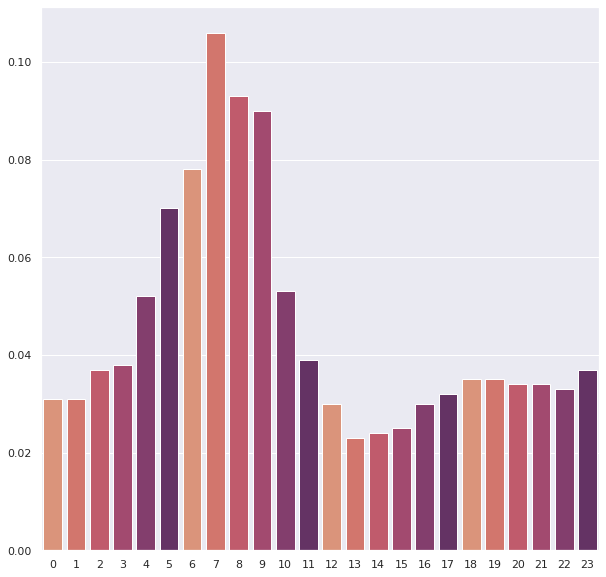

In [ ]:
x = []
y = []
for hour in hour_ratio:
  x.append(hour)
  y.append(hour_ratio[hour])
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=x, y=y, palette=sns.color_palette("flare"))

`get_important_features_by_ratio(data, tresh=0.4)`: restituisce un dizionario con le feature con rate di transazioni fraudolente ordinate per valore e sopra soglia 

In [ ]:
important_features, feature_ratio = mf.get_important_features_by_ratio(data)

Barplot dei rate individuati per feature. 

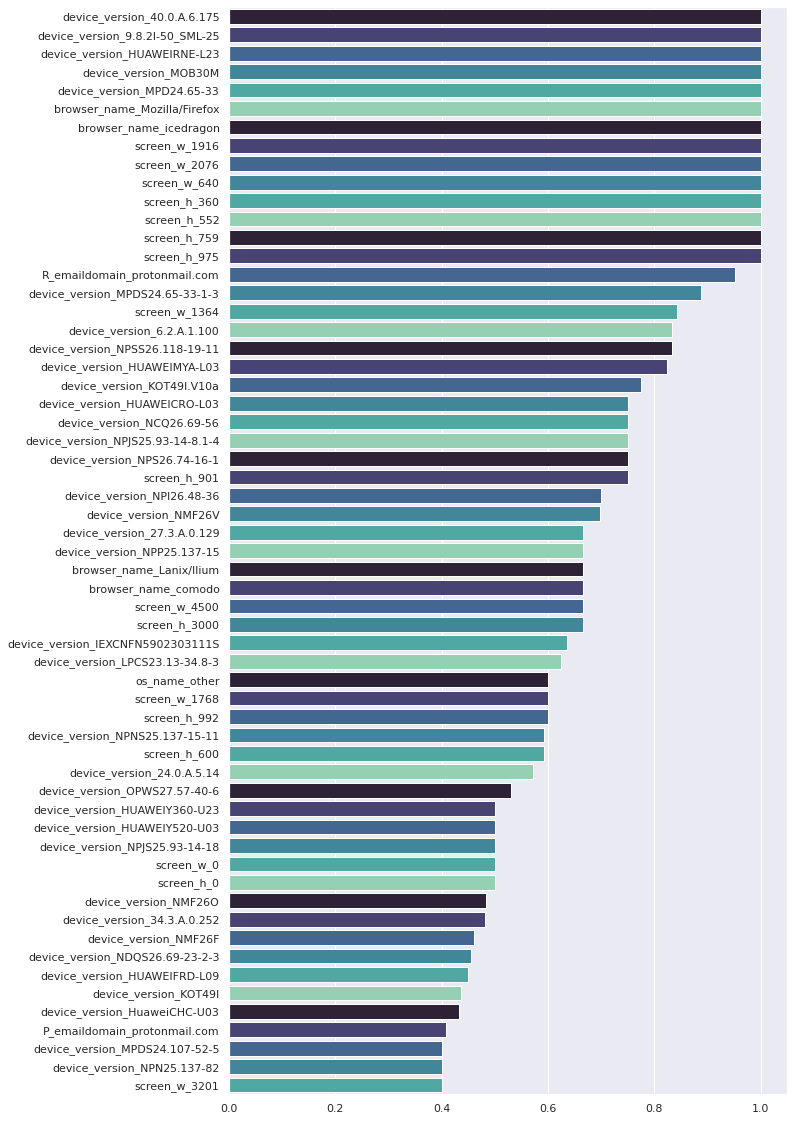

In [ ]:
x = []
for feature in important_features:
  x.append(feature_ratio[feature])
sns.set(rc={'figure.figsize':(10,20)})
sns.barplot(x=x, y=important_features, palette = sns.color_palette('mako'))